# Modelos de Difusión: Una Presentación Simple

## Historia y Popularización de los Modelos de Difusión

Los modelos de difusión tienen sus raíces en la investigación sobre procesos
estocásticos y termodinámica no-equilibrada. El concepto básico de "difusión"
en el contexto de modelos generativos fue introducido por Sohl-Dickstein et al.
en 2015 en el paper "Deep Unsupervised Learning using Nonequilibrium
Thermodynamics", donde se propuso usar procesos de difusión reversibles para
modelar distribuciones de datos.

Sin embargo, los modelos de difusión modernos, como los conocemos hoy, fueron
popularizados por el paper seminal "Denoising Diffusion Probabilistic Models"
de Jonathan Ho, Ajay Jain y Pieter Abbeel en 2020. Este trabajo mostró cómo los
modelos de difusión podían generar imágenes de alta calidad de manera estable,
superando algunos de los problemas de los GANs (Generative Adversarial
Networks).

La popularización explosiva ocurrió en 2021-2022 con mejoras significativas:
- "Improved Denoising Diffusion Probabilistic Models" (Nichol & Dhariwal,
  2021) introdujo mejoras en el muestreo y la calidad.
- "Diffusion Models Beat GANs on Image Synthesis" (Dhariwal & Nichol, 2021)
  demostró que los modelos de difusión podían superar a los GANs en calidad de
  imagen.
- Aplicaciones prácticas como DALL-E 2 de OpenAI y Stable Diffusion de
  Stability AI llevaron la tecnología al público general.

Hoy en día, los modelos de difusión son el estado del arte en generación de
imágenes, con aplicaciones en arte, diseño, medicina y más. Su estabilidad de
entrenamiento y capacidad de generación de alta calidad los han convertido en
una herramienta esencial en el aprendizaje profundo generativo.

## Entendiendo los Modelos de Difusión

Los modelos de difusión son una clase de modelos generativos que han ganado
mucha atención en los últimos años, especialmente por su capacidad para generar
imágenes, audio y otros datos de alta calidad. En su núcleo, los modelos de
difusión funcionan aprendiendo a revertir un proceso que gradualmente añade
ruido a los datos.

La idea está inspirada en la termodinámica no-equilibrada: imagina comenzar
con una imagen limpia y corromperla lentamente añadiendo ruido gaussiano en
muchos pasos. El modelo entonces aprende a desruir la imagen paso a paso,
generando efectivamente nuevos datos a partir de ruido aleatorio.

Ventajas clave de los modelos de difusión incluyen:
- Generación de alta calidad
- Entrenamiento estable
- Flexibilidad en el condicionamiento (ej. texto-a-imagen)

Referencia: Basado en el paper "Denoising Diffusion Probabilistic Models" de
Jonathan Ho et al. (2020).

## Componentes Clave de los Modelos de Difusión

Los modelos de difusión consisten en dos procesos principales:

1. **Proceso Directo (Difusión)**: Este es el proceso de añadir gradualmente
   ruido a los datos. Comenzando desde los datos originales x₀, añadimos ruido
   en T pasos para llegar a ruido puro x_T.

   El proceso directo se define como:
   q(x_t | x_{t-1}) = N(x_t; √(1-β_t) x_{t-1}, β_t I)

   Donde β_t es un horario de varianza que controla cuánto ruido se añade en
   cada paso.

2. **Proceso Inverso (Desruido)**: Este es el proceso aprendido que remueve el
   ruido paso a paso, comenzando desde x_T y trabajando hacia atrás hasta x₀.

   p(x_{t-1} | x_t) = N(x_{t-1}; μ_θ(x_t, t), σ_t² I)

   El modelo aprende la media μ_θ usando una red neuronal parametrizada por θ.

El objetivo de entrenamiento es minimizar la diferencia entre el ruido predicho
y el ruido real añadido en cada paso.

Referencia: Formulación matemática del paper original de Ho et al. y mejoras
en "Improved Denoising Diffusion Probabilistic Models" de Nichol y Dhariwal
(2021).

## Cómo se Usan los Modelos de Difusión

Los modelos de difusión se utilizan principalmente para generar nuevos datos que
parecen provenir de la misma distribución que los datos de entrenamiento. El
proceso típico incluye:

1. **Entrenamiento**: Se entrena una red neuronal (generalmente un U-Net) para
   predecir el ruido añadido en cada paso del proceso directo.

2. **Generación (Muestreo)**: Comenzando desde ruido puro, se aplica el proceso
   inverso paso a paso, usando la red entrenada para guiar cada transición.

3. **Aplicaciones comunes**:
   - **Generación de imágenes**: Crear arte, editar fotos, super-resolución
   - **Texto-a-imagen**: Convertir descripciones textuales en imágenes (ej.
     DALL-E, Stable Diffusion)
   - **Inpainting**: Rellenar partes faltantes de imágenes
   - **Síntesis de audio**: Generar música o voz
   - **Modelado molecular**: Diseñar nuevas moléculas para fármacos

Los modelos pueden ser condicionados con información adicional como texto,
etiquetas de clase o imágenes de referencia para controlar la generación.

## Diagrama de los Componentes Clave

A continuación, un diagrama simple que ilustra los componentes principales de
un modelo de difusión:

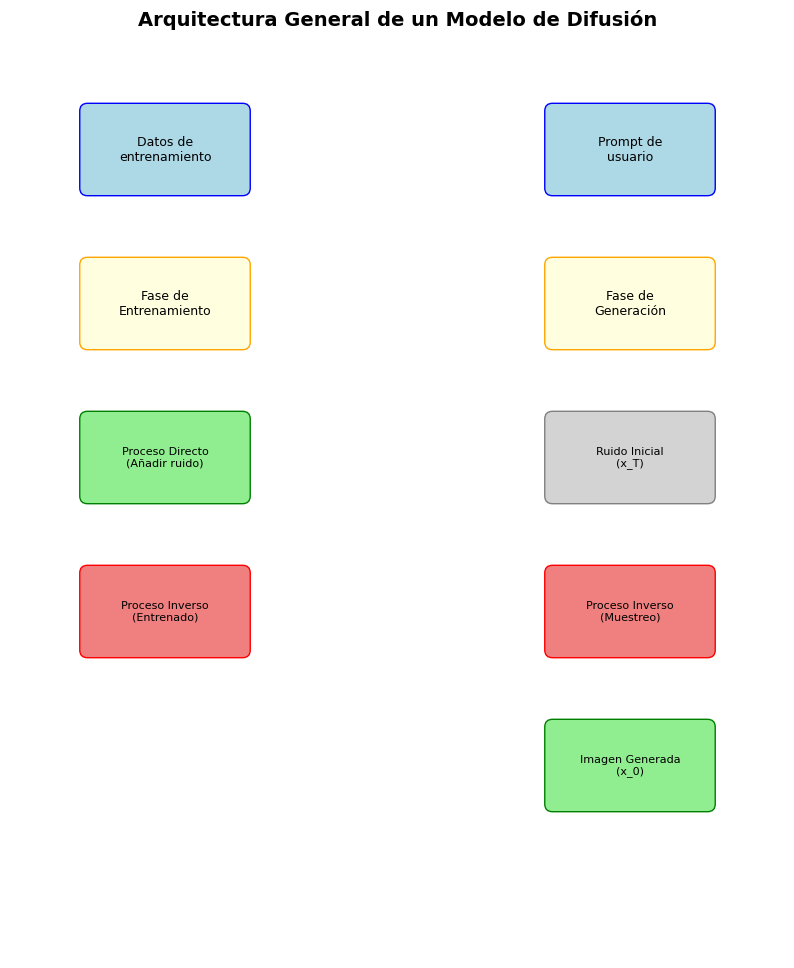

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 12))
ax.set_xlim(0, 10)
ax.set_ylim(0, 12)
ax.axis('off')

# Training column (left)
# Training data
rect_data = patches.FancyBboxPatch((1, 10), 2, 1, boxstyle="round,pad=0.1",
                                   facecolor='lightblue', edgecolor='blue')
ax.add_patch(rect_data)
ax.text(2, 10.5, 'Datos de\nentrenamiento', ha='center', va='center', fontsize=9)

# Training phase
rect_train = patches.FancyBboxPatch((1, 8), 2, 1, boxstyle="round,pad=0.1",
                                    facecolor='lightyellow', edgecolor='orange')
ax.add_patch(rect_train)
ax.text(2, 8.5, 'Fase de\nEntrenamiento', ha='center', va='center', fontsize=9)

# Forward process
rect_forward = patches.FancyBboxPatch((1, 6), 2, 1, boxstyle="round,pad=0.1",
                                      facecolor='lightgreen', edgecolor='green')
ax.add_patch(rect_forward)
ax.text(2, 6.5, 'Proceso Directo\n(Añadir ruido)', ha='center', va='center', fontsize=8)

# Reverse process training
rect_reverse_train = patches.FancyBboxPatch((1, 4), 2, 1, boxstyle="round,pad=0.1",
                                            facecolor='lightcoral', edgecolor='red')
ax.add_patch(rect_reverse_train)
ax.text(2, 4.5, 'Proceso Inverso\n(Entrenado)', ha='center', va='center', fontsize=8)

# Arrows for training (vertical)
# ax.arrow(2, 9.5, 0, -1, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
# ax.arrow(2, 7.5, 0, -1, head_width=0.1, head_length=0.1, fc='orange', ec='orange')
# ax.arrow(2, 5.5, 0, -1, head_width=0.1, head_length=0.1, fc='green', ec='green')
# ax.arrow(2, 4, 0, 1, head_width=0.1, head_length=0.1, fc='red', ec='red')  # loop back

# Generation column (right)
# User prompt
rect_prompt = patches.FancyBboxPatch((7, 10), 2, 1, boxstyle="round,pad=0.1",
                                     facecolor='lightblue', edgecolor='blue')
ax.add_patch(rect_prompt)
ax.text(8, 10.5, 'Prompt de\nusuario', ha='center', va='center', fontsize=9)

# Generation phase
rect_gen = patches.FancyBboxPatch((7, 8), 2, 1, boxstyle="round,pad=0.1",
                                  facecolor='lightyellow', edgecolor='orange')
ax.add_patch(rect_gen)
ax.text(8, 8.5, 'Fase de\nGeneración', ha='center', va='center', fontsize=9)

# Noise input
rect_noise = patches.FancyBboxPatch((7, 6), 2, 1, boxstyle="round,pad=0.1",
                                    facecolor='lightgray', edgecolor='gray')
ax.add_patch(rect_noise)
ax.text(8, 6.5, 'Ruido Inicial\n(x_T)', ha='center', va='center', fontsize=8)

# Reverse process generation
rect_reverse_gen = patches.FancyBboxPatch((7, 4), 2, 1, boxstyle="round,pad=0.1",
                                          facecolor='lightcoral', edgecolor='red')
ax.add_patch(rect_reverse_gen)
ax.text(8, 4.5, 'Proceso Inverso\n(Muestreo)', ha='center', va='center', fontsize=8)

# Generated output
rect_output = patches.FancyBboxPatch((7, 2), 2, 1, boxstyle="round,pad=0.1",
                                     facecolor='lightgreen', edgecolor='green')
ax.add_patch(rect_output)
ax.text(8, 2.5, 'Imagen Generada\n(x_0)', ha='center', va='center', fontsize=8)

# Arrows for generation (vertical)
# ax.arrow(8, 9.5, 0, -1, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
# ax.arrow(8, 7.5, 0, -1, head_width=0.1, head_length=0.1, fc='orange', ec='orange')
# ax.arrow(8, 5.5, 0, -1, head_width=0.1, head_length=0.1, fc='gray', ec='gray')
# ax.arrow(8, 3.5, 0, -1, head_width=0.1, head_length=0.1, fc='red', ec='red')

plt.title('Arquitectura General de un Modelo de Difusión', fontsize=14, fontweight='bold')
plt.show()

## Implementando un Proceso de Difusión Básico

Vamos a implementar un proceso de difusión simple usando NumPy. Simularemos añadir ruido a una señal 1D simple y luego intentar revertirlo.

Primero, importemos las librerías necesarias:

Señal original vs señal con ruido:
¿Coincide la señal revertida con la original? True
Máxima diferencia: 6.106226635438361e-16


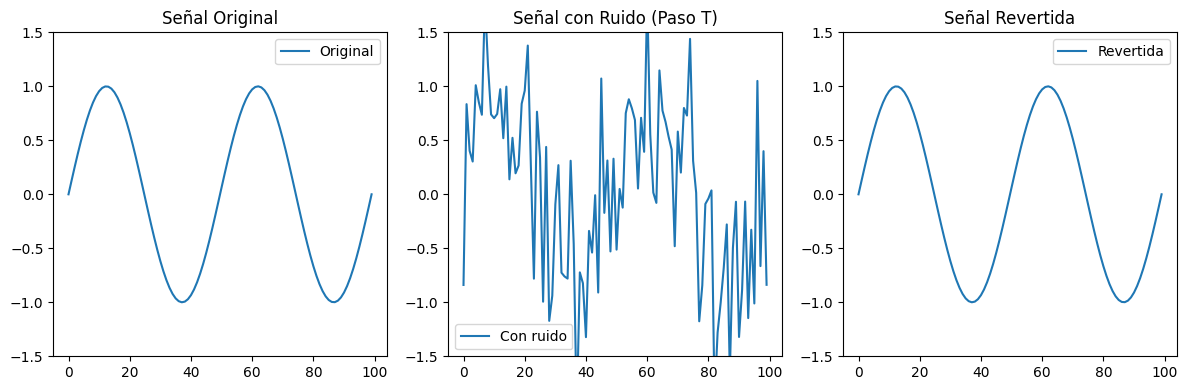

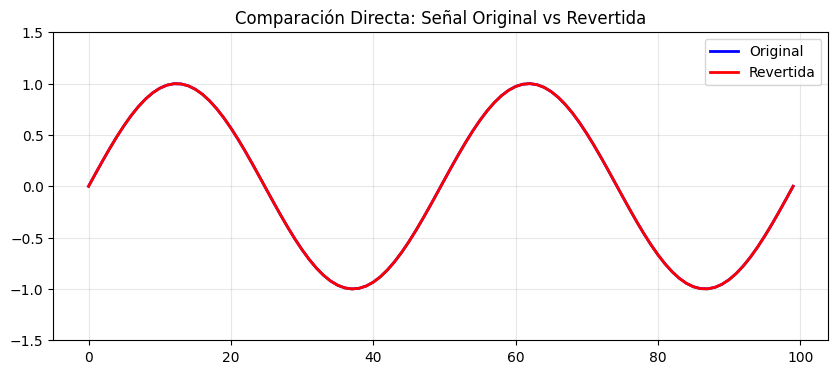

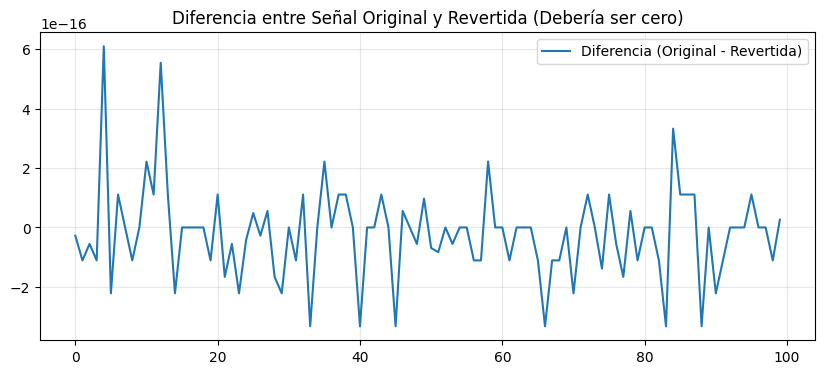

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una señal simple (onda sinusoidal)
x_0 = np.sin(np.linspace(0, 4*np.pi, 100))

# Parámetros de difusión
T = 10  # Número de pasos
beta = np.linspace(0.01, 0.1, T)  # Horario de varianza

# Proceso directo: añadir ruido
x_t = x_0.copy()
noises = []  # Lista para almacenar los ruidos añadidos
x_steps = [x_0.copy()]  # Lista para almacenar los pasos
for t in range(T):
    noise = np.random.normal(0, np.sqrt(beta[t]), x_0.shape)
    x_t = np.sqrt(1 - beta[t]) * x_t + noise
    noises.append(noise.copy())
    x_steps.append(x_t.copy())

print("Señal original vs señal con ruido:")
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x_0, label='Original')
plt.title('Señal Original')
plt.legend()
plt.ylim(-1.5, 1.5)

plt.subplot(1, 3, 2)
plt.plot(x_steps[-1], label='Con ruido')
plt.title('Señal con Ruido (Paso T)')
plt.legend()
plt.ylim(-1.5, 1.5)

# Reversión correcta usando los ruidos almacenados
x_reversed = x_steps[-1].copy()
for t in reversed(range(T)):
    x_reversed = (x_reversed - noises[t]) / np.sqrt(1 - beta[t])

print("¿Coincide la señal revertida con la original?", np.allclose(x_reversed, x_0))
print(f"Máxima diferencia: {np.max(np.abs(x_reversed - x_0))}")

plt.subplot(1, 3, 3)
plt.plot(x_reversed, label='Revertida')
plt.title('Señal Revertida')
plt.legend()
plt.ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

# Comparación directa: superponer original y revertida
plt.figure(figsize=(10, 4))
plt.plot(x_0, 'b-', label='Original', linewidth=2)
plt.plot(x_reversed, 'r-', label='Revertida', linewidth=2)
plt.title('Comparación Directa: Señal Original vs Revertida')
plt.legend()
plt.ylim(-1.5, 1.5)
plt.grid(True, alpha=0.3)
plt.show()

# Mostrar la diferencia para verificar que son idénticas
plt.figure(figsize=(10, 4))
plt.plot(x_0 - x_reversed, label='Diferencia (Original - Revertida)')
plt.title('Diferencia entre Señal Original y Revertida (Debería ser cero)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Visualizando los Pasos de Difusión

El código anterior muestra una implementación básica. En modelos reales, se usa una red neuronal para predecir el ruido en cada paso del proceso inverso.

**¿Qué son los pasos de difusión?** Los pasos de difusión representan los momentos temporales en el proceso de añadir ruido. Comenzamos con el dato original en el paso 0 (x₀), y gradualmente añadimos ruido hasta llegar al paso T (x_T), que es ruido puro. En nuestro ejemplo, T=10, por lo que tenemos 11 pasos en total (0 a 10).

Para una mejor visualización, podemos mostrar cómo cambia la señal en diferentes pasos:

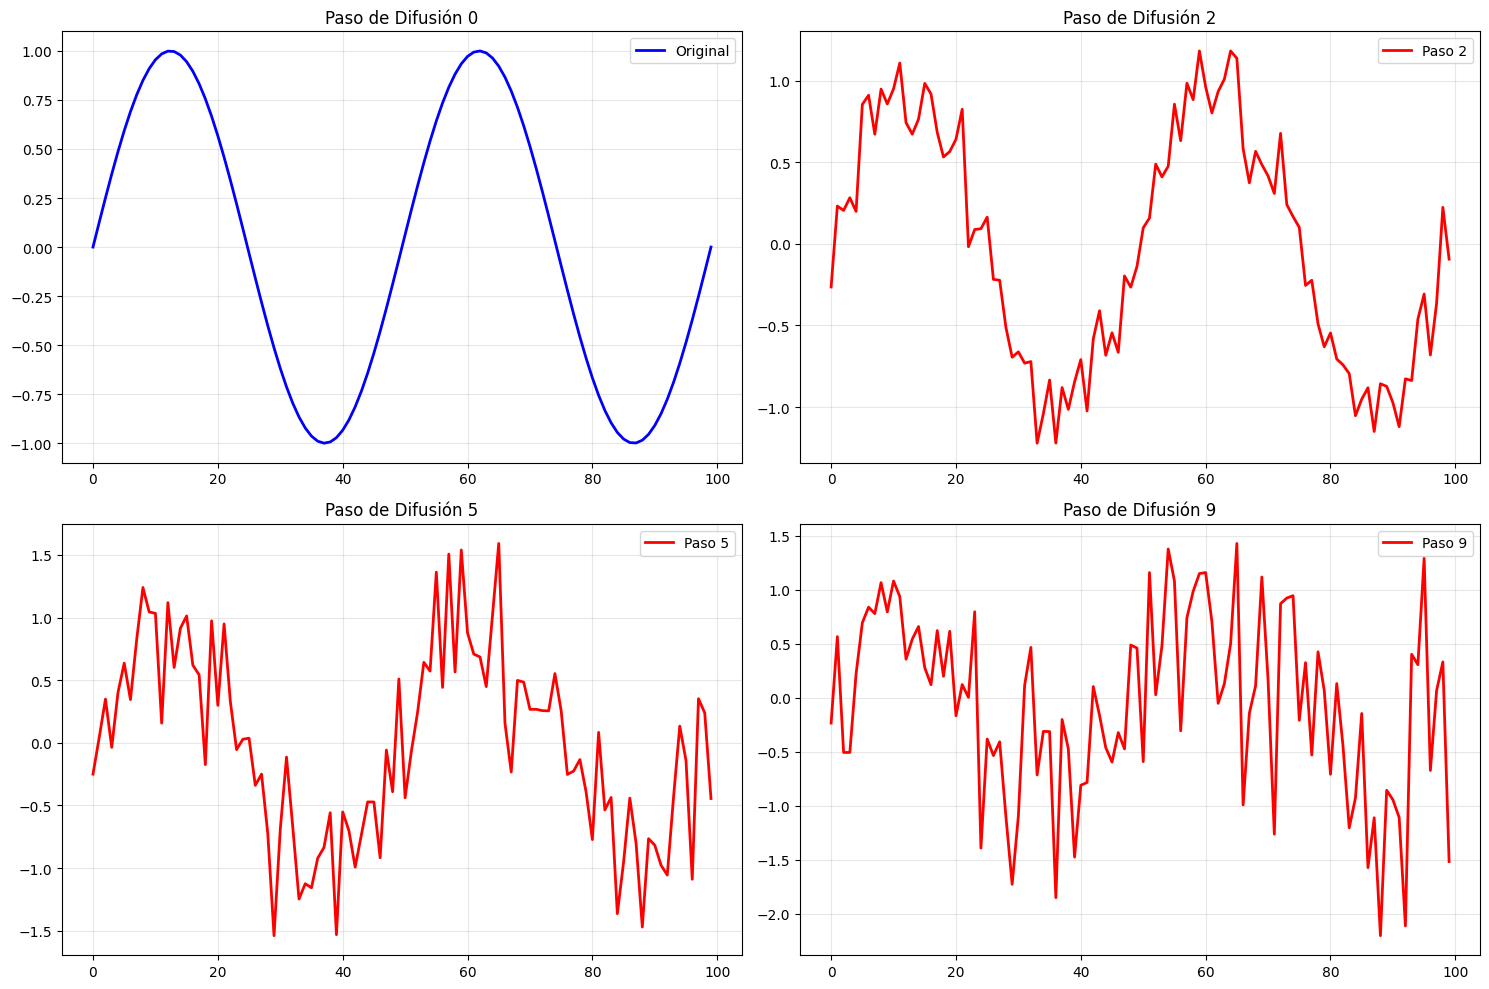

Nota: En un modelo real, el proceso inverso usaría una red neuronal entrenada para predecir y remover el ruido correctamente.


In [ ]:
# Visualizar pasos intermedios
plt.figure(figsize=(15, 10))
steps_to_show = [0, 2, 5, 9]  # Pasos 0 (original), 2, 5, 9

for i, step in enumerate(steps_to_show):
    plt.subplot(2, 2, i+1)
    if step == 0:
        plt.plot(x_0, 'b-', linewidth=2, label='Original')
    else:
        plt.plot(x_steps[step], 'r-', linewidth=2, label=f'Paso {step}')
    plt.title(f'Paso de Difusión {step}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Nota: En un modelo real, el proceso inverso usaría una red neuronal entrenada para predecir y remover el ruido correctamente.")

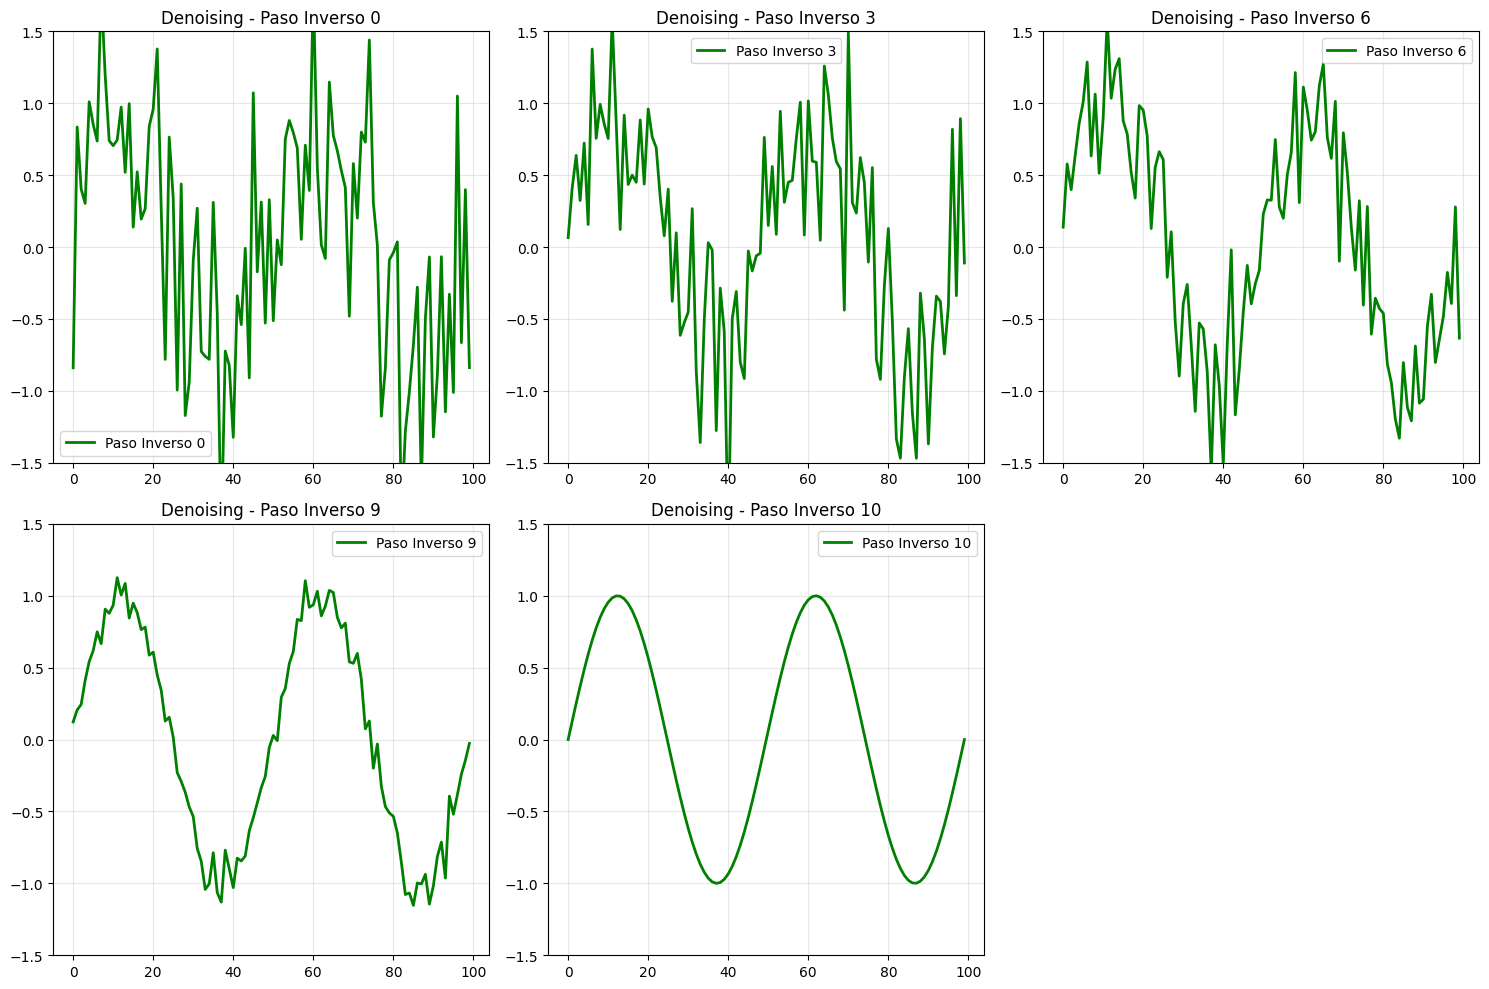

Nota: En un modelo real, cada paso usaría una red neuronal para predecir el ruido y removerlo aproximadamente, no exactamente como aquí.


In [5]:
# Simulación del proceso inverso paso a paso (denoising progresivo)
x_current = x_steps[-1].copy()
reverse_steps = [x_current.copy()]  # Empezar con x_T (ruido puro)

for t in reversed(range(T)):
    x_current = (x_current - noises[t]) / np.sqrt(1 - beta[t])
    reverse_steps.append(x_current.copy())

# reverse_steps ahora tiene [x_T, x_{T-1}, ..., x_0]

plt.figure(figsize=(15, 10))
steps_to_show_reverse = [0, 3, 6, 9, 10]  # Pasos del proceso inverso: 0=ruido, 10=limpio

for i, step in enumerate(steps_to_show_reverse):
    plt.subplot(2, 3, i+1)
    plt.plot(reverse_steps[step], 'g-', linewidth=2, label=f'Paso Inverso {step}')
    plt.title(f'Denoising - Paso Inverso {step}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

print("Nota: En un modelo real, cada paso usaría una red neuronal para predecir el ruido y removerlo aproximadamente, no exactamente como aquí.")

## Referencias

1. Sohl-Dickstein, J., Weiss, E., Maheswaranathan, N., & Ganguli, S. (2015). Deep Unsupervised Learning using Nonequilibrium Thermodynamics. *International Conference on Machine Learning*. [arXiv:1503.03585](https://arxiv.org/abs/1503.03585)

2. Ho, J., Jain, A., & Abbeel, P. (2020). Denoising Diffusion Probabilistic Models. *Advances in Neural Information Processing Systems*, 33, 6840-6851. [arXiv:2006.11239](https://arxiv.org/abs/2006.11239)

3. Nichol, A. Q., & Dhariwal, P. (2021). Improved Denoising Diffusion Probabilistic Models. *International Conference on Machine Learning*. [arXiv:2102.09672](https://arxiv.org/abs/2102.09672)

4. Dhariwal, P., & Nichol, A. (2021). Diffusion Models Beat GANs on Image Synthesis. *Advances in Neural Information Processing Systems*, 34. [arXiv:2105.05233](https://arxiv.org/abs/2105.05233)

5. Song, Y., & Ermon, S. (2019). Generative Modeling by Estimating Gradients of the Data Distribution. *Advances in Neural Information Processing Systems*, 32. [arXiv:1907.05600](https://arxiv.org/abs/1907.05600)

Información adicional disponible en:
- Wikipedia: [Modelos de Difusión](https://en.wikipedia.org/wiki/Diffusion_model) (versión en inglés, ya que la española puede estar limitada)
- Blog de OpenAI sobre DALL-E 2, que usa modelos de difusión: [DALL-E 2 Paper](https://cdn.openai.com/papers/dall-e-2.pdf)